<a href="https://colab.research.google.com/github/kamya11/Hotel-Booking-EDA/blob/main/Hotel_Booking_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [82]:
# Mount google colab with google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:

data = pd.read_csv('/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv')
data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [84]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [85]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [86]:
data.shape

(119390, 32)

In [87]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [88]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [89]:
# Checking null values

data.isna().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [90]:
# dropping the columns agent and company as they contain most of the null values

data = data.drop(['agent', 'company'],axis = 1)

In [91]:
# Again checking the shape of dataset after dropping columns

data.shape

(119390, 30)

In [92]:
data.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [93]:
# Now we drop all the null values in our dataset

data = data.dropna()

In [94]:
# Final shape of the dataset after removing all null values

data.shape

(118898, 30)

<Figure size 2160x1440 with 0 Axes>

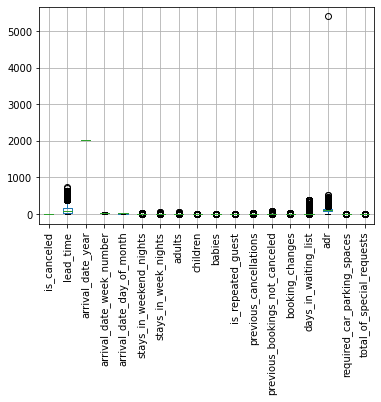

<Figure size 2160x1440 with 0 Axes>

In [95]:
# Lets check the outliers with boxplot

data.boxplot()
plt.xticks (rotation=90)
plt.figure(figsize=(30,20))

From the boxplot we see that , lead_time, days_in_waiting_list and adr have most of the outliers.

In [96]:
# Removing outliers with IQR

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
print("\nInterquartileRange=\n", IQR)


data1 = data[~((data < (q1 - 1.5* IQR)) | (data > (q3 + 1.5 * IQR))).any(axis=1)]
data1.shape


InterquartileRange=
 is_canceled                         1.0
lead_time                         143.0
arrival_date_year                   1.0
arrival_date_week_number           22.0
arrival_date_day_of_month          15.0
stays_in_weekend_nights             2.0
stays_in_week_nights                2.0
adults                              0.0
children                            0.0
babies                              0.0
is_repeated_guest                   0.0
previous_cancellations              0.0
previous_bookings_not_canceled      0.0
booking_changes                     0.0
days_in_waiting_list                0.0
adr                                56.0
required_car_parking_spaces         0.0
total_of_special_requests           1.0
dtype: float64


(55020, 30)

In [97]:
data1.head(5) # data without outliers

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06


In [98]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55020 entries, 4 to 119388
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           55020 non-null  object 
 1   is_canceled                     55020 non-null  int64  
 2   lead_time                       55020 non-null  int64  
 3   arrival_date_year               55020 non-null  int64  
 4   arrival_date_month              55020 non-null  object 
 5   arrival_date_week_number        55020 non-null  int64  
 6   arrival_date_day_of_month       55020 non-null  int64  
 7   stays_in_weekend_nights         55020 non-null  int64  
 8   stays_in_week_nights            55020 non-null  int64  
 9   adults                          55020 non-null  int64  
 10  children                        55020 non-null  float64
 11  babies                          55020 non-null  int64  
 12  meal                           

In [124]:
data['hotel'].value_counts(normalize=True)*100

City Hotel      66.697505
Resort Hotel    33.302495
Name: hotel, dtype: float64

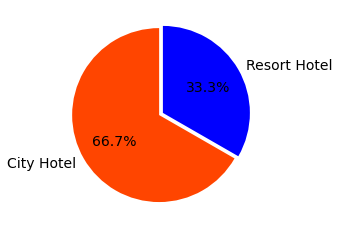

In [99]:
# Checking the percentage of hotel type using pie chart

labels = data['hotel'].value_counts().index.tolist()
sizes = data['hotel'].value_counts().tolist()
explode = (0, 0.05)
colors = ['orangered', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})
plt.show()

([<matplotlib.patches.Wedge at 0x7f5cc1a2e6d0>,
 [Text(-1.0113763824572926, -0.4325711652521476, '0'),
  Text(1.1033196457713303, 0.47189591993894836, '1')],
 [Text(-0.551659844976705, -0.23594790831935322, '62.9%'),
  Text(0.6436031266999426, 0.2752726199643865, '37.1%')])

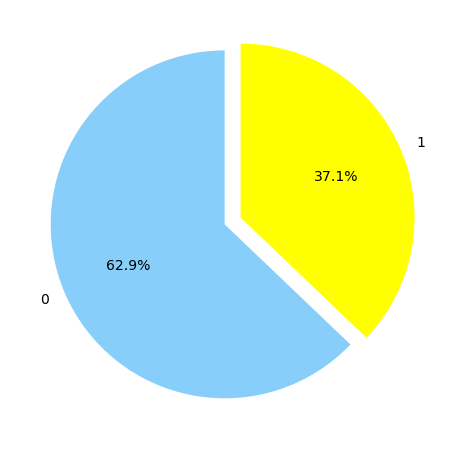

In [100]:
# Checking the percentage of cancelled bookings using pie chart

plt.rcParams['figure.figsize'] = 8,8
labels = data['is_canceled'].value_counts().index.tolist()   
sizes = data['is_canceled'].value_counts().tolist() 
explode = (0, 0.1)
colors = ['lightskyblue','yellow']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})  

In [131]:
data['arrival_date_month'].value_counts().reset_index()

,index,arrival_date_month
0,August,13852
1,July,12628
2,May,11779
3,October,11095
4,April,11045
5,June,10927
6,September,10467
7,March,9739
8,February,8012
9,November,6752


Text(0, 0.5, 'Count')

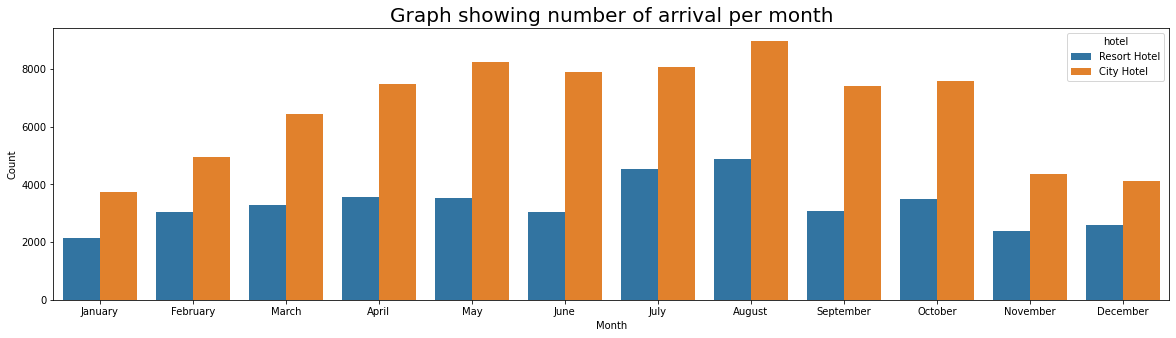

In [101]:
# Checking bookings according to months

plt.figure(figsize=(20,5))

sns.countplot(data = data, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

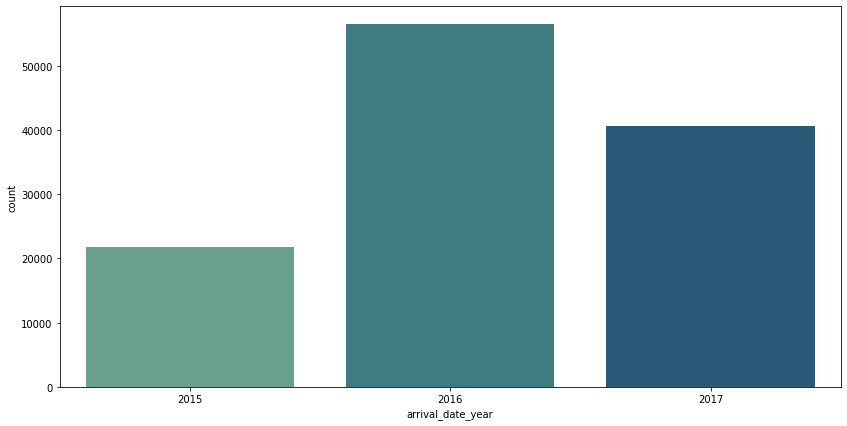

In [102]:
# Bookings according to year

plt.figure(figsize=(14,7))
sns.countplot(data['arrival_date_year'], palette='crest')  
plt.show()

In [121]:
# Number of bookings by top 10 countries 
data['country'].value_counts()[:11].reset_index()


,index,country
0,PRT,48586
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
5,ITA,3766
6,IRL,3375
7,BEL,2342
8,BRA,2224
9,NLD,2104


Text(0.5, 1.0, 'Types of distribution channel')

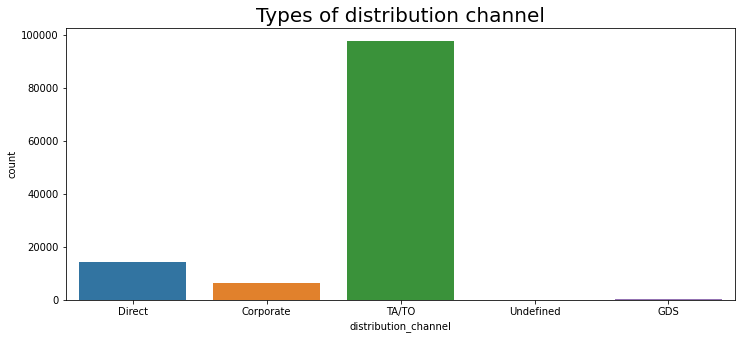

In [116]:
# plotting types of distribution channel 

plt.figure(figsize=(12,5))
sns.countplot(data = data, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

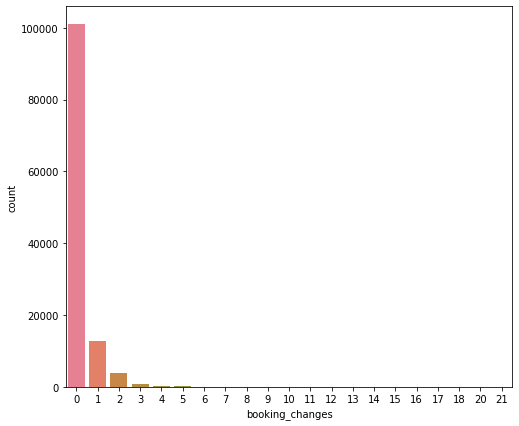

In [103]:
# Booking changes 

plt.figure(figsize=(8,7))
sns.countplot(data['booking_changes'], palette='husl')  
plt.show()

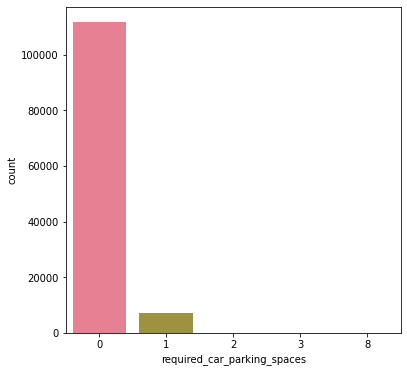

In [104]:
plt.figure(figsize=(6,6))
sns.countplot(data['required_car_parking_spaces'], palette='husl')
plt.show()

Text(0.5, 1.0, 'Number of stays on weekend nights')

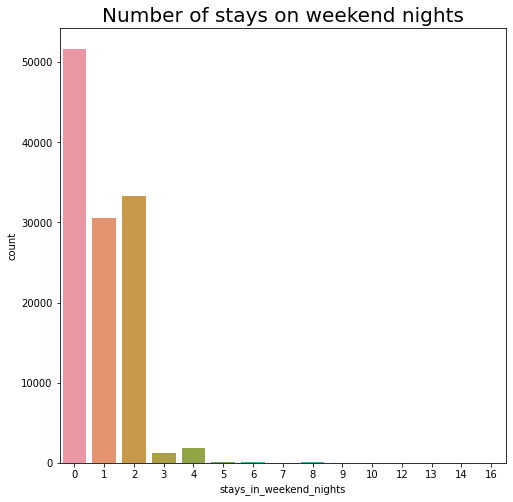

In [105]:
# Number of stays on weekend nights

sns.countplot(data = data, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)

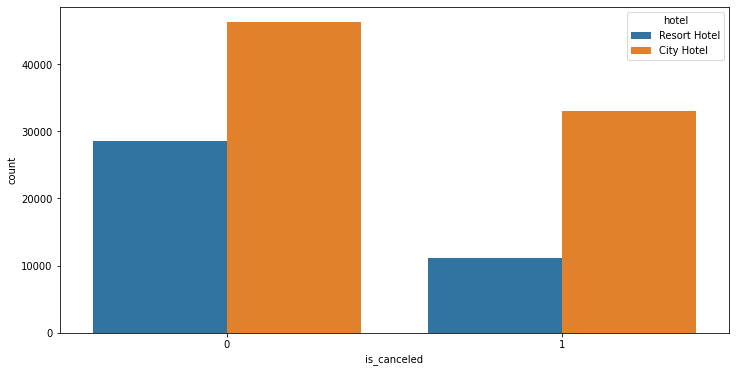

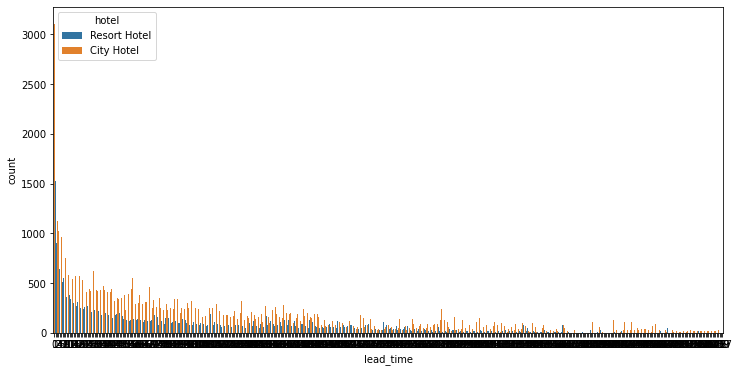

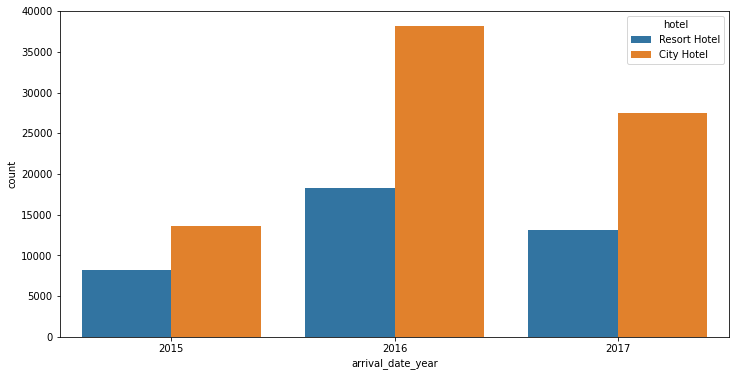

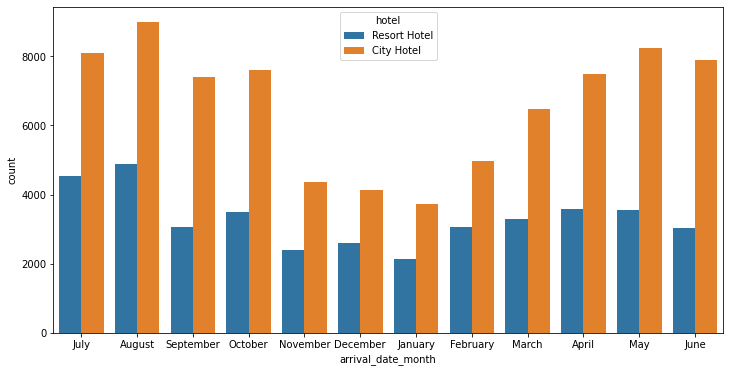

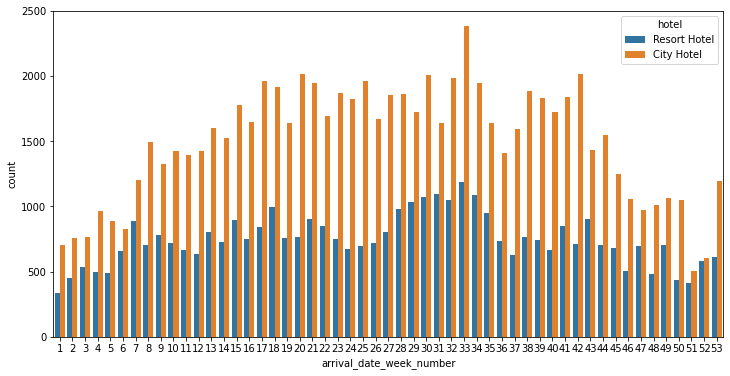

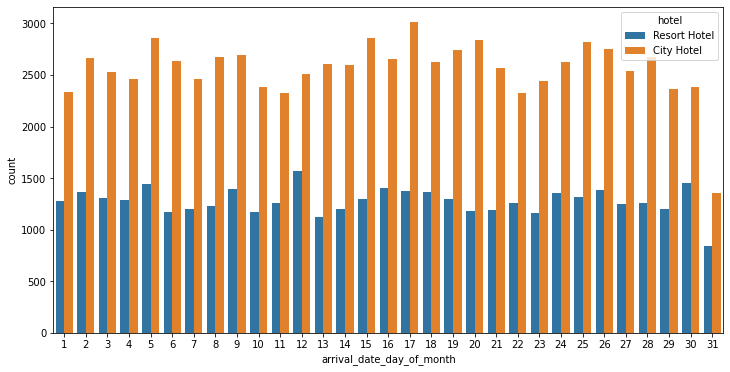

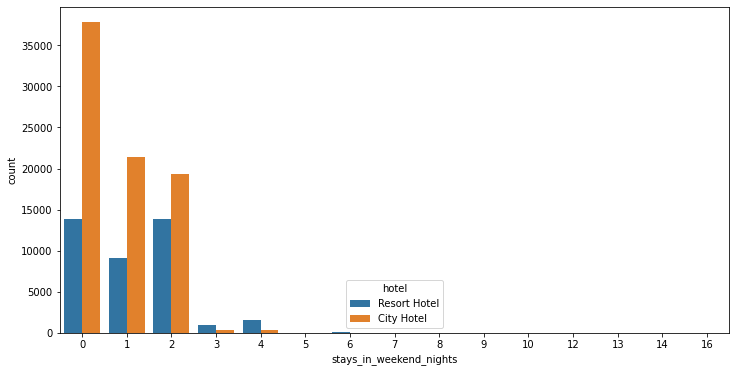

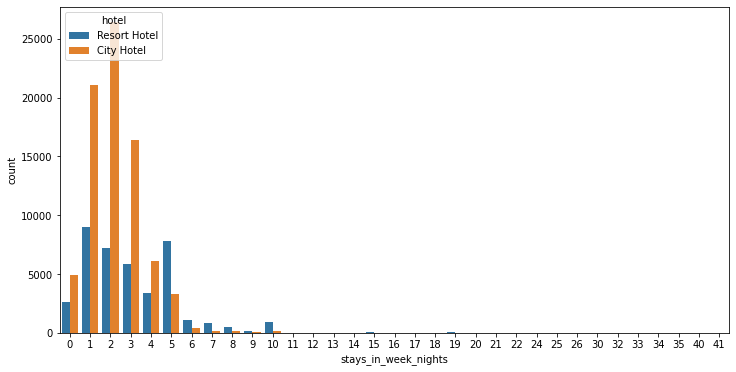

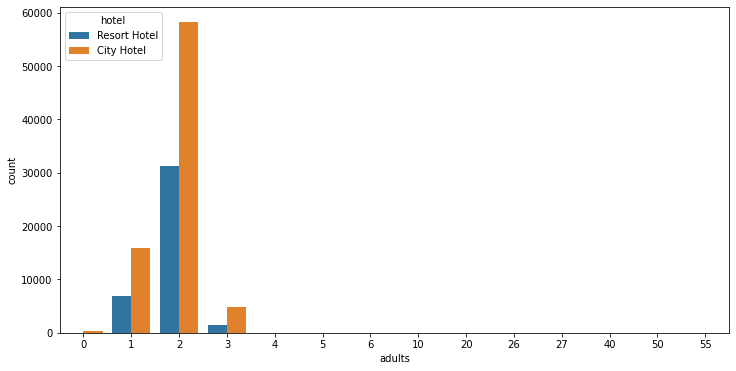

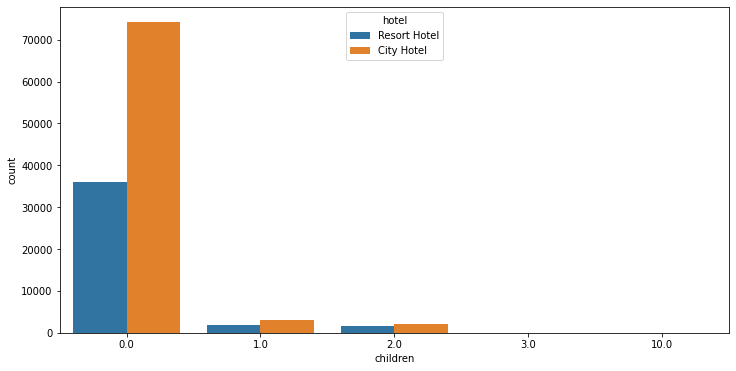

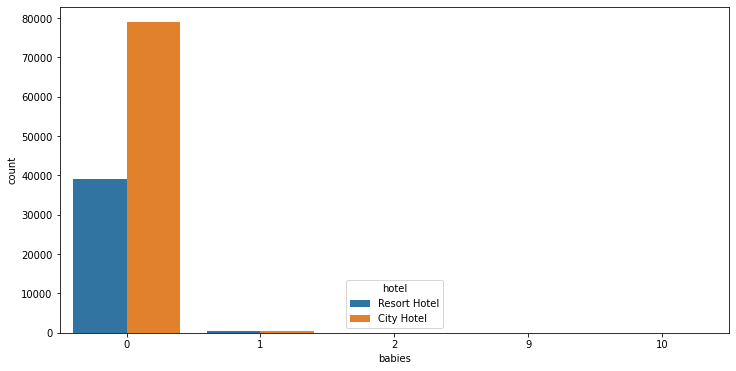

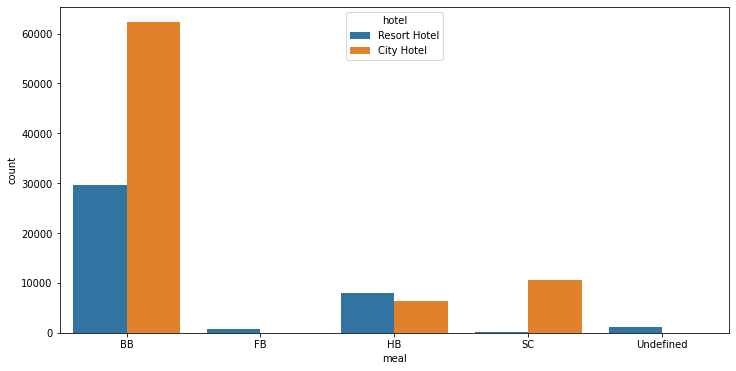

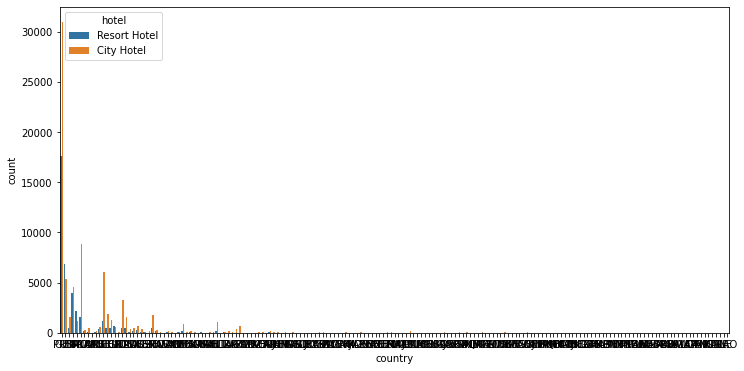

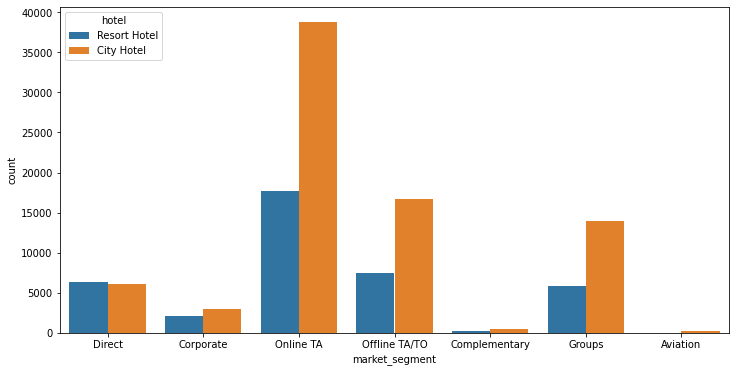

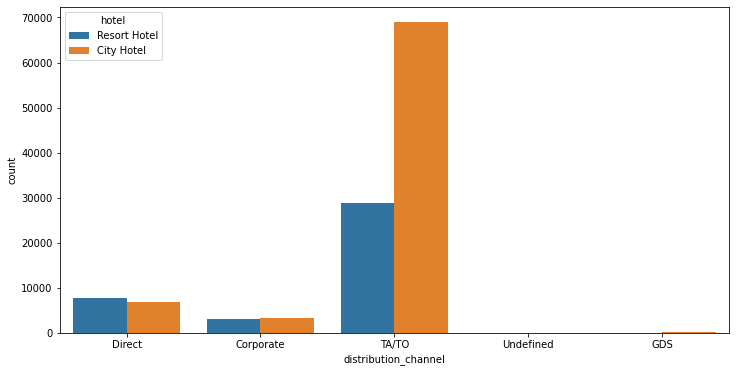

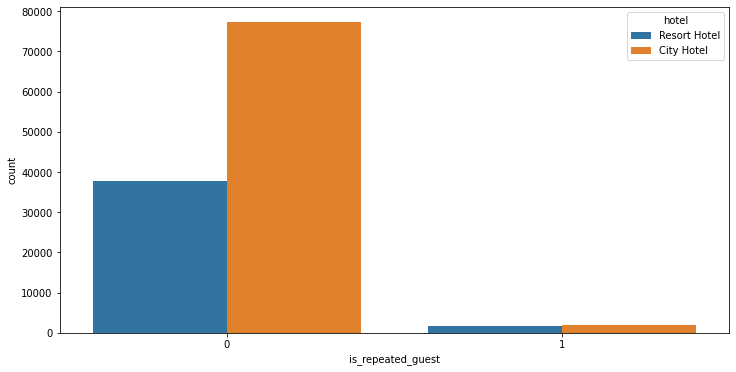

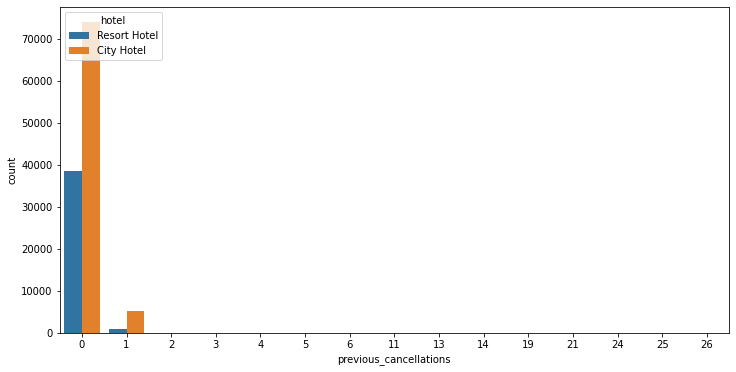

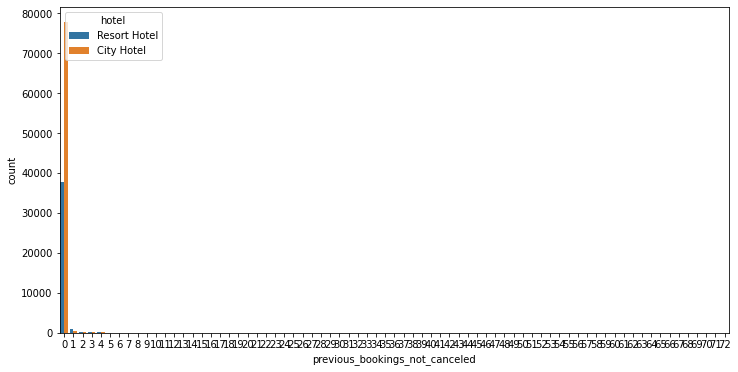

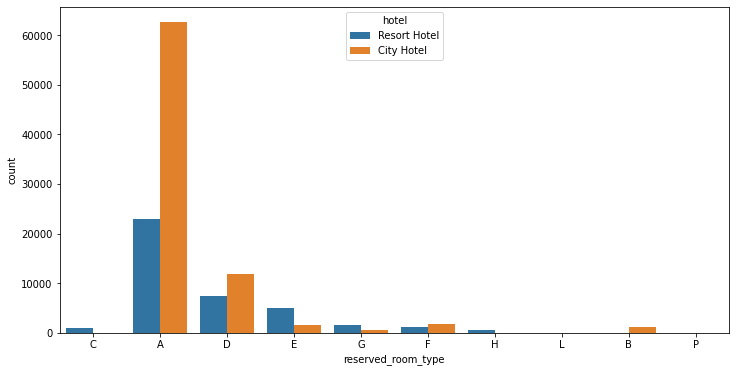

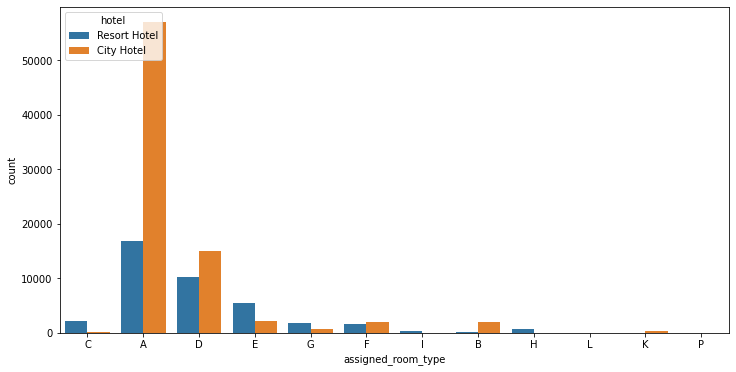

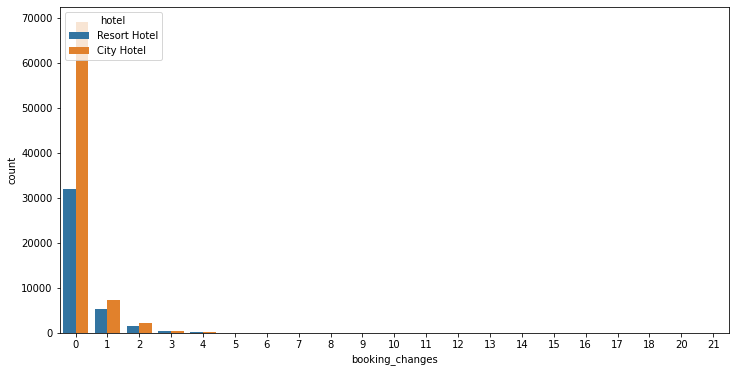

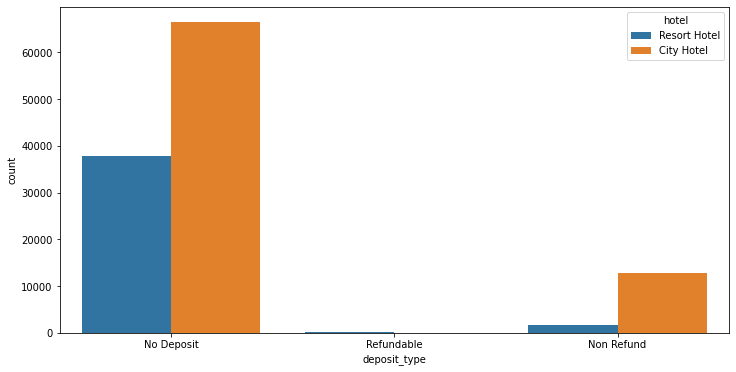

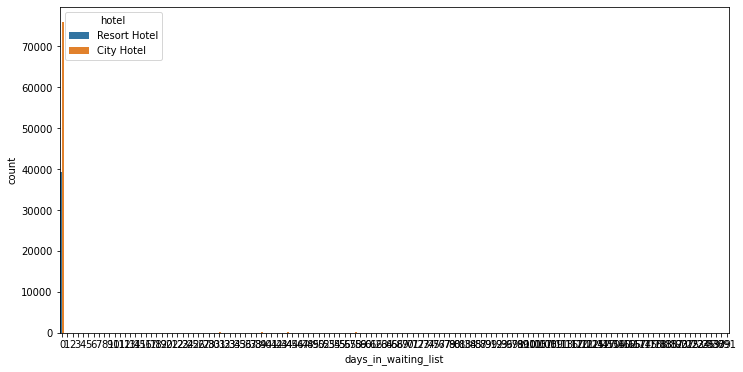

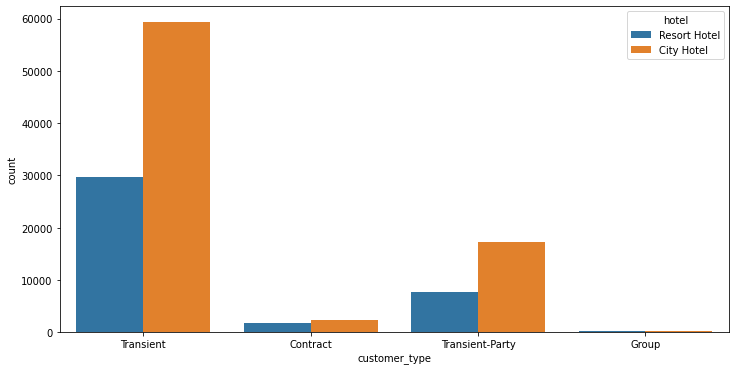

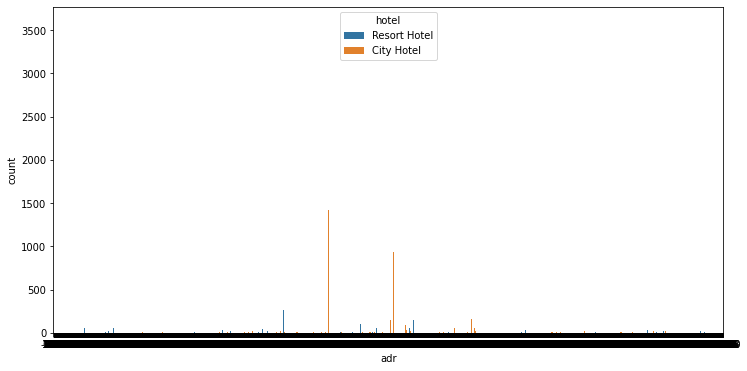

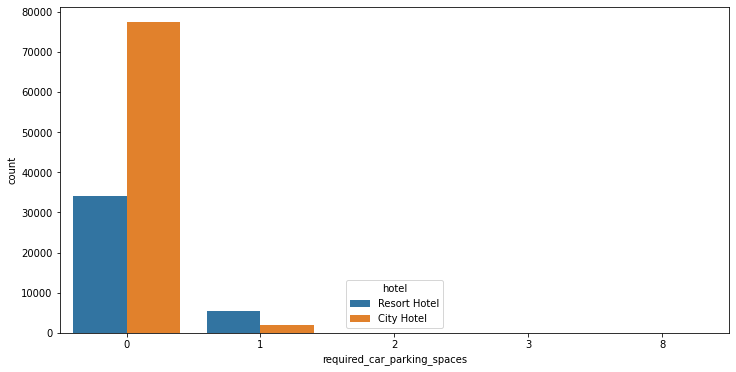

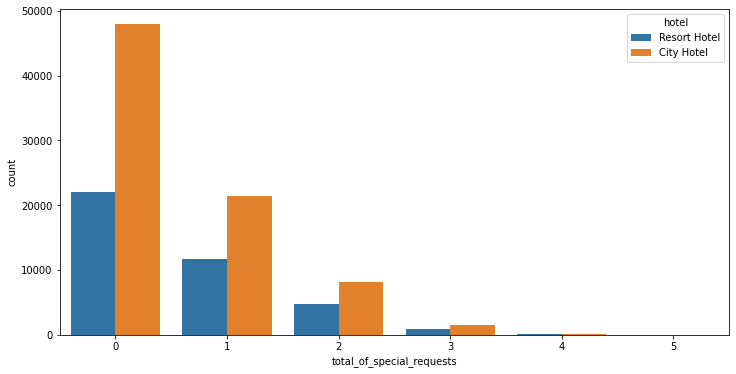

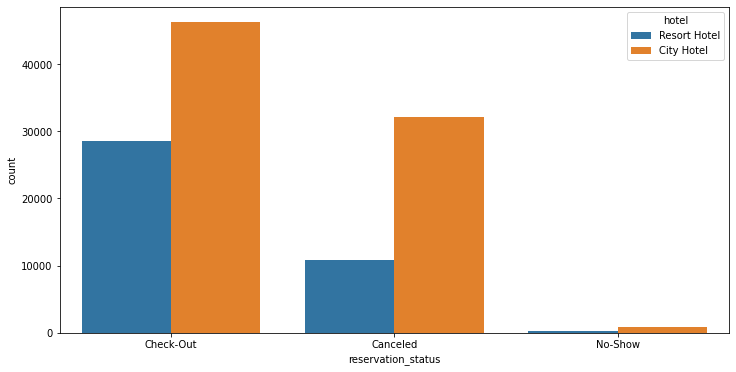

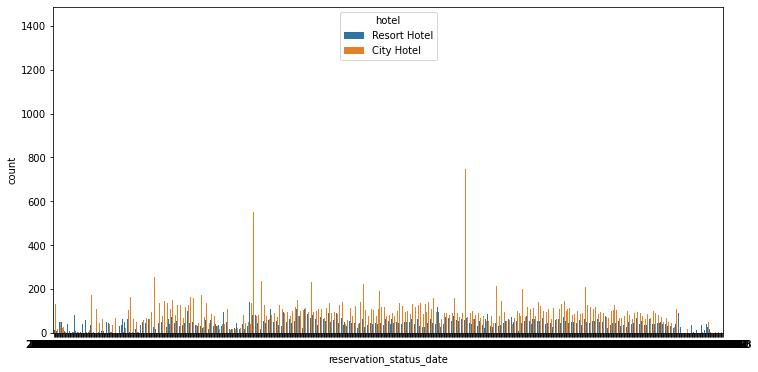

In [106]:
for column in data.columns[1:]:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  sns.countplot(data[column], x= column, hue=data['hotel'], ax= ax)
plt.show()

In [107]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0.5, 1.0, 'Coolwarm Heatmap of the Hotel Booking Dataframe')

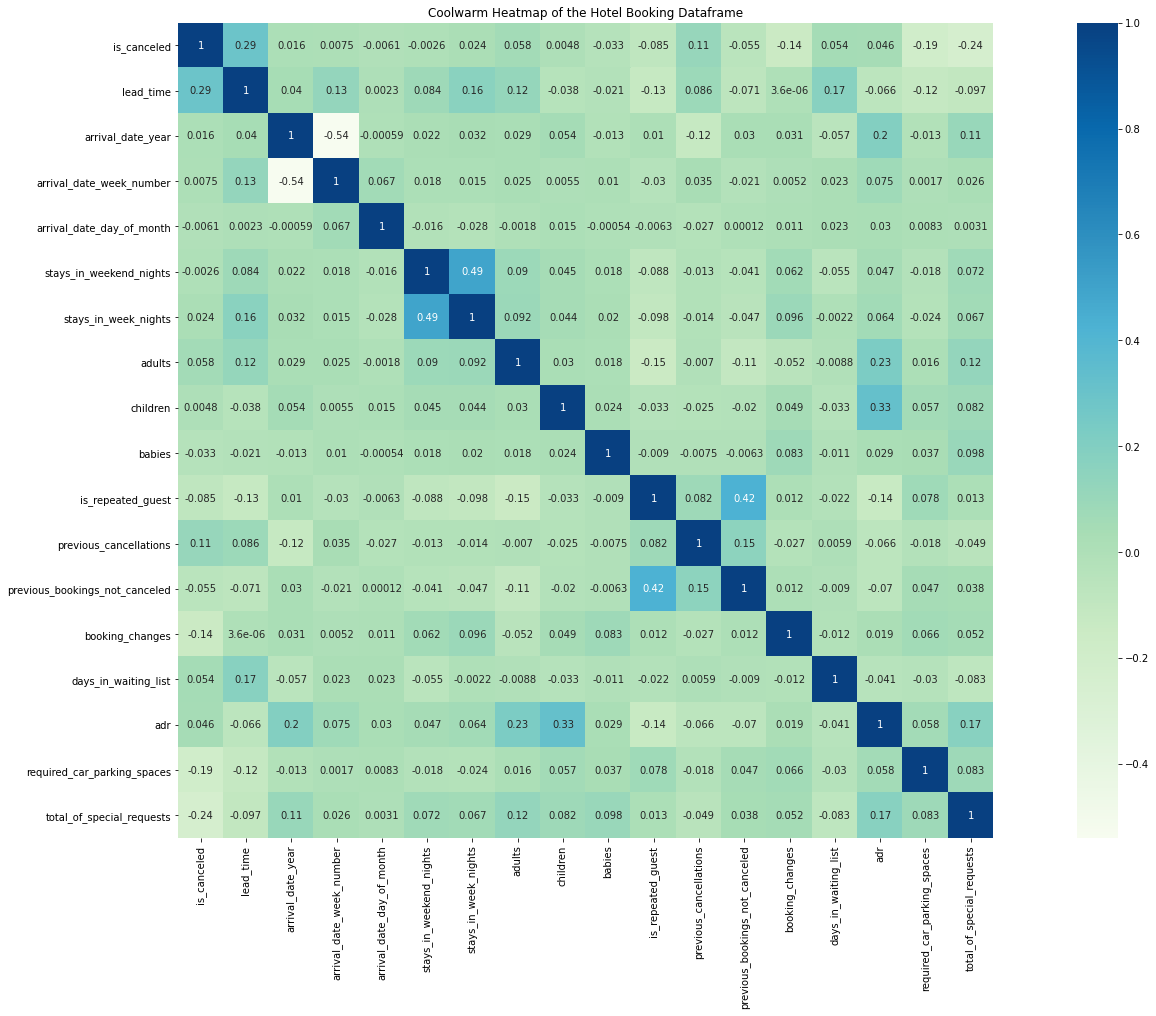

In [108]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corrmat, square=True, annot= True, cmap= 'GnBu')
ax.set_title('Coolwarm Heatmap of the Hotel Booking Dataframe')

In [110]:
# Showing the various distributed countries with confirmed bookings around the globe.

country_visitors = data[data['is_canceled'] == 0].groupby(['country']).size().reset_index(name = 'count')

# We will be using Plotly.express to plot a choropleth map. 
import plotly.express as px

# choropleth will give map presentation of the confirmed bookings 
px.choropleth(country_visitors,                            
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

Text(0.5, 1.0, 'Scatter plot for Market Segment vs Days in waiting list')

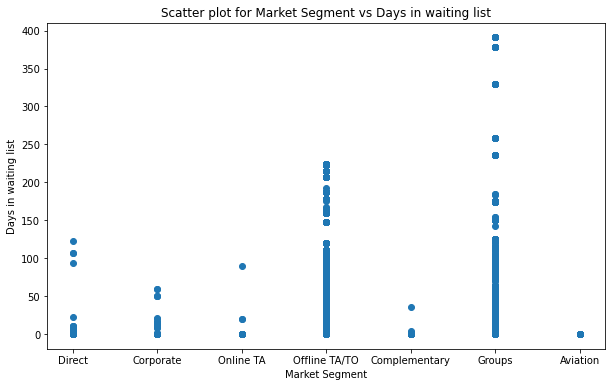

In [111]:
fig, ax = plt.subplots(figsize= (10,6))
ax.scatter(data['market_segment'], data['days_in_waiting_list'])  # Scatterplot of market segment and days in waiting list 
ax.set_xlabel('Market Segment')
ax.set_ylabel('Days in waiting list')
ax.set_title('Scatter plot for Market Segment vs Days in waiting list')

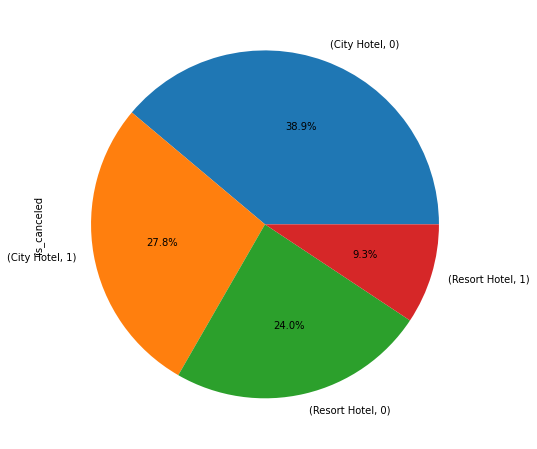

In [113]:
cancellations_by_month= data.groupby(['hotel','is_canceled'])['is_canceled'].count().plot(kind='pie' , autopct='%1.1f%%')

Text(0, 0.5, 'Number of bookings')

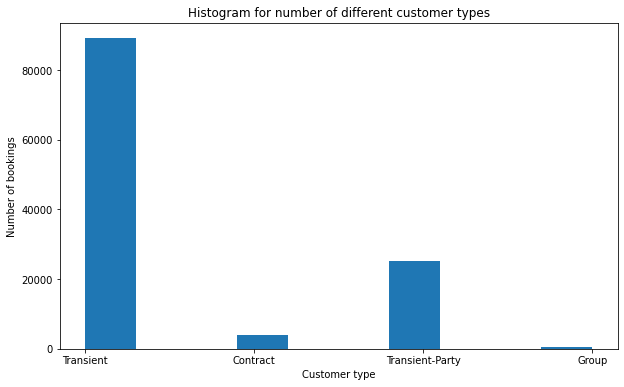

In [114]:
plt.figure(figsize=(10,6))
plt.hist(data['customer_type'])
plt.title('Histogram for number of different customer types')
plt.xlabel('Customer type')
plt.ylabel('Number of bookings')

Text(0.5, 1.0, 'Number of adults')

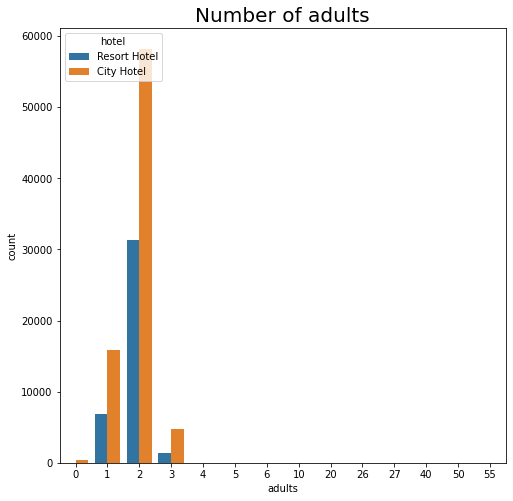

In [115]:
# Checking the count of adults 

sns.countplot(data = data, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)